## Laboratorio 3 – Clasificación
Jalal Kaddoura - Adaptado a Dataset Flavia - Binario

# Inicio




Primero descarguemos la información del tar, para esto vamos a escribir código que nos ayude a esta función.

In [1]:
# instalamos esta dependencia que es necesaria en un punto
!pip install pillow
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 16.7 MB/s eta 0:00:0000:0100:01


In [3]:
import os
import tempfile
import tarfile
import zipfile
import numpy as np

np.random.seed(42)

d = tempfile.mkdtemp()

flavia_archive_name = 'Leaves.tar.bz2'
flavia_archive_path = '/tmp/Leaves.tar.bz2'

fn = flavia_archive_path
info = None

extraction_dir_in_temp = os.path.join(d, 'flavia_leaves')

if not os.path.exists(extraction_dir_in_temp):
    os.makedirs(extraction_dir_in_temp)

if tarfile.is_tarfile(fn):
    with tarfile.open(fn, 'r') as tar_ref:
        print(f"[INFO] Extrayendo {flavia_archive_name} en {extraction_dir_in_temp}...")
        tar_ref.extractall(extraction_dir_in_temp)
        print("[INFO] Extracción completa.")
elif zipfile.is_zipfile(fn):
    with zipfile.ZipFile(fn, 'r') as zip_ref:
        print(f"[INFO] Extrayendo {flavia_archive_name} (como .zip) en {extraction_dir_in_temp}...")
        zip_ref.extractall(extraction_dir_in_temp)
        print("[INFO] Extracción completa.")
else:
    print(f"[ERROR] El archivo {flavia_archive_name} no es un archivo .tar o .zip válido. Asegúrate de que el nombre del archivo y la extensión son correctos y que está en la ubicación correcta.")

print(f"[INFO] Las imágenes de Flavia se encuentran en: {os.path.abspath(extraction_dir_in_temp)}")


FileNotFoundError: [Errno 2] No such file or directory: '/tmp/Leaves.tar.bz2'

In [32]:
print("[INFO] Creada carpeta temporal en:", fn)
print("[INFO] Mi directorio actual de trabajo es:", os.getcwd())

[INFO] Creada carpeta temporal en: /tmp/Leaves.tar.bz2
[INFO] Mi directorio actual de trabajo es: /app/ArtificialIntelligence/Laboratorios/Lab1


In [33]:
myimagedir = os.path.join(os.getcwd(), 'leaves') 
if not os.path.exists(myimagedir):
    os.mkdir(myimagedir)
tar = tarfile.open(fn)
tar.extractall(path=myimagedir, members=None, numeric_owner=False)
tar.close()

Finalmente removemos el archivo y luego el directorio.  Adicionalmente removemos el README donde existe el archivo de hojas que no nos sirve de nada.

In [34]:
import shutil 
if os.path.exists(d):
    shutil.rmtree(d) 
    print(f"[INFO] Directorio temporal {d} y su contenido eliminados.")

[INFO] Directorio temporal /tmp/tmpb96s466g y su contenido eliminados.


Ahora vamos a crear un archivo para marcar las etiquetas.  Este archivo estará compuesto de las clases.  Asumiremos lo siguiente:

0 = 5 Puntas

1 = 3 Puntas, Tipo 1

2 = 3 Puntas, Tipo 2

Si al final de generar abrimos el archivo veremos que esta compuesto de 0's 1's y 2's en cada linea.

In [8]:
import os
import numpy as np
myimagedir = '/app/ArtificialIntelligence/Laboratorios/Lab1/leaves/Leaves'
jpeglist = os.listdir(myimagedir)
CASTOR_ARALIA_RANGE = (1386, 1437) #Clase 0
YEW_PLUM_PINE_RANGE = (2616, 2675) #Clase 1
selected_image_paths = []
selected_labels = []

for filename in jpeglist:
    if filename.endswith('.jpg'):
        try:
        
            image_number = int(filename.split('.')[0])
           
            if CASTOR_ARALIA_RANGE[0] <= image_number <= CASTOR_ARALIA_RANGE[1]:
                selected_image_paths.append(os.path.join(myimagedir, filename))
                selected_labels.append(0) #0 para Castor Aralia
            elif YEW_PLUM_PINE_RANGE[0] <= image_number <= YEW_PLUM_PINE_RANGE[1]:
                selected_image_paths.append(os.path.join(myimagedir, filename))
                selected_labels.append(1) #1 para Yew Plum Pine
        except ValueError:  
            continue

target = np.array(selected_labels, dtype=np.uint8)
print(f"Se han seleccionado {len(selected_image_paths)} imágenes para la clasificación binaria.")
print(f"Las etiquetas generadas son: {target}")

Se han seleccionado 112 imágenes para la clasificación binaria.
Las etiquetas generadas son: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


# LEAF DATASET

Ya que tenemos las etiquetas del sistema podemos transferirlas del archivo de texto a un arreglo de numpy.

Nuestra imagen es de (896 x 592), 3 canales y son alrededor de 186 imagenes

Primero procesaremos esto para convertirlo en un arreglo de numpy de (m, n) dimensiones.  Siendo m = ancho x largo x numero_de_canales

In [9]:
from PIL import Image
import numpy as np
if len(selected_image_paths) > 0:
    img_example = Image.open(selected_image_paths[0])
    actual_width, actual_height = img_example.size
    print(f"Dimensiones de una imagen de ejemplo de FLAVIA: Ancho={actual_width}, Alto={actual_height}")
    img_example.close()
else:
    print("No hay imágenes seleccionadas para verificar las dimensiones. Asegúrate de que el paso anterior funcionó correctamente.")
w = actual_width  
h = actual_height 

nchan = 3 
nimages = len(selected_image_paths) 
imgarr = np.zeros((w * h * nchan, nimages), dtype=np.uint8)
for index, image_path in enumerate(selected_image_paths):
    img = Image.open(image_path).convert('RGB') # Asegurarse de que sea RGB
    
    pixels = np.array(img).reshape(w * h * nchan)
    imgarr[:, index] = pixels

print(f"Forma final de imgarr: {imgarr.shape}")
print(f"Forma final de target: {target.shape}")




Dimensiones de una imagen de ejemplo de FLAVIA: Ancho=1600, Alto=1200
Forma final de imgarr: (5760000, 112)
Forma final de target: (112,)


In [10]:
imgarr.shape, pixels.shape

((5760000, 112), (5760000,))

Ahora intentaremos graficar alguna hoja aleatoria de la base de datos para saber si conseguimos el resultado esperado.

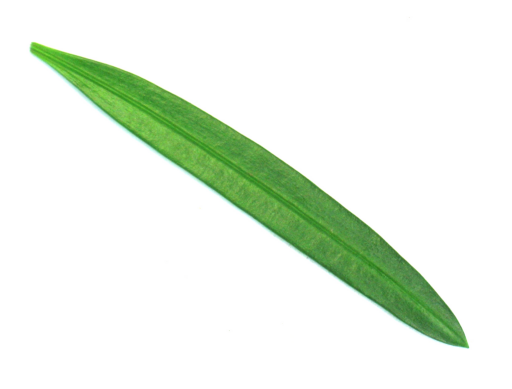

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy.random import randint

# Define las dimensiones de tus imágenes
w = 1600 # Ancho
h = 1200 # Alto
nchan = 3 # Canales
nimages = imgarr.shape[1] # Número de imágenes cargadas (112)

# Ahora imprimiremos una hoja aleatoria
# El rango de randint debe ser de 0 a nimages-1
# El reshape debe usar (alto, ancho, canales)
some_leaf = imgarr[:, randint(0, nimages - 1)].reshape(h, w, nchan)
plt.imshow(some_leaf)
plt.axis("off")

plt.show()


In [12]:
import numpy as np

# Conteode la cantidad de imágenes para cada clase
count_class_0 = np.sum(target == 0)
count_class_1 = np.sum(target == 1)

print(f"Número de imágenes para la Clase 0 (Castor Aralia): {count_class_0}")
print(f"Número de imágenes para la Clase 1 (Yew Plum Pine): {count_class_1}")


Número de imágenes para la Clase 0 (Castor Aralia): 52
Número de imágenes para la Clase 1 (Yew Plum Pine): 60


In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

X_processed = imgarr.T 

X_train, X_test, Y_train, Y_test = train_test_split(
    X_processed, target, test_size=0.20, random_state=42, stratify=target
)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de Y_train: {Y_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de Y_test: {Y_test.shape}")

print("\nDistribución de clases en Y_train:")
print(np.bincount(Y_train))
print("\nDistribución de clases en Y_test:")
print(np.bincount(Y_test))


Forma de X_train: (89, 5760000)
Forma de Y_train: (89,)
Forma de X_test: (23, 5760000)
Forma de Y_test: (23,)

Distribución de clases en Y_train:
[41 48]

Distribución de clases en Y_test:
[11 12]


Dividimos el traning set y el test set manualmente.  

Por ejemplo, el dataset actualmente consta de 180 imagenes pues eliminamos las 6 imagenes para balancearlo (no se refiere a balancear el dataset, sinlo la cuenta de elementos de prueba clase 0, 1 y 2).

Las imagenes se separan de:

Training de 0 a 48, 60 a 108 y 120 a 168.

Las ultimas 12 restantes de cada sección corresponderán al test set para realizar las predicciones.

In [134]:
nimginclass = 60
train = int(0.8*60)
test = 60 - train

Xtrain = np.hstack((X[:,   :48], X[:, 60:(60+48)], X[:, 120:(120+48)]))/255
Xtest  = np.hstack((X[:, 48:(48+12)], X[:, (60+48):(60+48+12)], X[:, (120+48):]))/255
Ytrain = np.hstack((Y[:48], Y[60:(60+48)], Y[120:(120+48)]))
Ytest  = np.hstack((Y[48:(48+12)], Y[(60+48):(60+48+12)], Y[(120+48):]))

print("Existen {} imagenes de training en una clase y {} imagenes de prueba en cada clase para un total de {} imagenes por clase".format(train, test, nimginclass))

Existen 48 imagenes de training en una clase y 12 imagenes de prueba en cada clase para un total de 60 imagenes por clase


# Clasificación Multiclase (Adaptado a Binario)

Ahora utilizaremos un gradiente descendente estocastico y ajustaremos algunos hiperparámetros para conseguir siempre el mismo resultado cada vez que ejecutemos el workbook.

In [14]:
from sklearn.linear_model import SGDClassifier
import numpy as np 

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) 
sgd_clf.fit(X_train, Y_train)
print("Modelo entrenado exitosamente.")

Modelo SGDClassifier entrenado exitosamente.


In [15]:
Y_predict = sgd_clf.predict(X_test)
print("Predicciones del modelo (Y_predict):")
print(Y_predict)
print("\nEtiquetas reales del conjunto de prueba (Y_test):")
print(Y_test)

Predicciones del modelo (Y_predict):
[0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0]

Etiquetas reales del conjunto de prueba (Y_test):
[0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0]


No está tan mal.  Para ser un batch de 36 imagenes de prueba y 144 imagenes de training solamente el resultado se apega bastante a la realidad. 

Ahora exploraremos la métrica de cross_validation para observar que tan bien o mal lo hizo nuestro dataset.

In [19]:
from sklearn.model_selection import cross_val_score

Ahora utilizaremos una métrica para el rendimiento de la predicción llamada validación cruzada.  Esta función evalua el modelo utilizado usando validación cruzada con k-fold y en este caso son 3.

Esto quiere decir que un k-fold divide el training set en 3 k-folds realizando las predicciones y evaluando cada una de ellas usando el modelo entrenado de los folds pendientes.

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import numpy as np 

kfold = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

print("Puntuaciones de precisión por fold (validación cruzada manual):")
for train_index, val_index in kfold.split(X_train, Y_train):
    clonemodel  = clone(sgd_clf)
    
    X_train_fold = X_train[train_index]
    Y_train_fold = Y_train[train_index]
    X_val_fold  = X_train[val_index]
    Y_val_fold  = Y_train[val_index]
    
    clonemodel.fit(X_train_fold, Y_train_fold)
    
    predictions = clonemodel.predict(X_val_fold)
    
    num_correct = sum(predictions == Y_val_fold)
    accuracy_fold = num_correct / len(predictions)
    print(f"  Precisión del fold: {accuracy_fold:.4f}")


Puntuaciones de precisión por fold (validación cruzada manual):
  Precisión del fold: 1.0000
  Precisión del fold: 1.0000
  Precisión del fold: 0.9310


Lo mismo que lo anterior, evalua la misma métrica.  Note que da el mismo valor.

In [20]:
scores = cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")

print("Puntuaciones de validación cruzada (Accuracy):")
print(scores)
print(f"Precisión promedio: {scores.mean():.4f}")
print(f"Desviación estándar de la precisión: {scores.std():.4f}")

Puntuaciones de validación cruzada (Accuracy):
[1. 1. 1.]
Precisión promedio: 1.0000
Desviación estándar de la precisión: 0.0000


Una mejor manera de evaluar el modelo y su desempeño es a base de la matriz de confusión.

Esta matriz nos muestra cuantos elementos de, por ejemplo la clase 0, fueron clasificados como clase 1 o 2.

Lo correcto sería obtener una diagonal oscura, que simboliza que todos los elementos fueron clasificados correctamente.

Para realizar una matriz de confusión se deben poseer las predicciones y el set de etiquetas de entrenamiento.

También se puede evaluar las predicciones del test set pero lo común en proyectos de machine learning es usar el test set al final para realizar pruebas ya del modelo depurado.

Matriz de Confusión (sobre el conjunto de entrenamiento):
[[41  0]
 [ 0 48]]


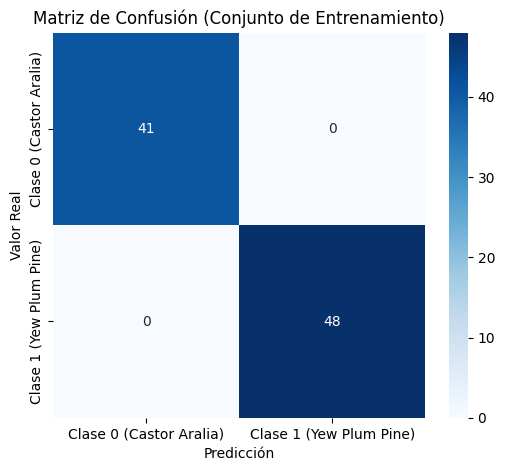

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Y_train_predict = sgd_clf.predict(X_train)

conf_matrix_train = confusion_matrix(Y_train, Y_train_predict)

print("Matriz de Confusión (sobre el conjunto de entrenamiento):")
print(conf_matrix_train)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Clase 0 (Castor Aralia)", "Clase 1 (Yew Plum Pine)"],
            yticklabels=["Clase 0 (Castor Aralia)", "Clase 1 (Yew Plum Pine)"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión (Conjunto de Entrenamiento)")
plt.show()

Así como las validaciones crusadas de cross_val_score(), también la siguiente funcion cross_val_predict() puede realizar varias k-fold especificadas para validación cruzada.  

Sin embargo en vez de retornar los 'scores' retorna las 'predicciones' de cada k-fold.  

Se tienen predicciones que fueron hechas por el modelo y nunca vio la data durante el entrenamiento, lo cual es bueno a la hora de evaluación del modelo.

In [144]:
Ypredictions = cross_val_predict(sgd_clf, Xtrain.T, Ytrain, cv=3)

Solo de referencias de uso, validas solo para clasificación binaria.  Para clasficiacion binaria average='binary' o simplemente obviar el campo average, por defecto es binario.

## Métricas de Clasificación Binaria 

Si bien es cierto estas métricas no califican para un modelo multiclase, se explicará parte de su uso para entender mejor su desempeño sobre el modelo binario.

La precisión es la medición de los resultados positivos de tu modelo.

\begin{equation}
Precision = \frac{TP}{TP + FP}
\end{equation}

En donde:
 - TP = Verdaderos positivos o muestras que fueron clasificadas y catalogadas como debieron ser
 - FP = Falsos positivos o muestras que fueron clasificadas y catalogadas como de otra clase que no es la correspondiente.

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(Y_train, Y_train_predict, average="micro")
print(f"Precisión: {precision:.4f}")

Precisión: 1.0000


También se usa la siguiente métrica llamada 'recall' que es el radio de los verdaderos positivos y falsos negativos

\begin{equation}
Recall = \frac{TP}{TP + FN}
\end{equation}

En donde:
 - FN = Falsos negativos 

In [27]:
recall = recall_score(Y_train, Y_train_predict, average="micro")
print(f"Recall: {recall:.4f}")

Recall: 1.0000


Frecuentemente también se combinan la precision y el recall para una sola métrica llamada F1 Score

Esta representa la media armónica de precision y recall.  Las medidas regulares de precision y recal dan medias o pesos equitativos, sin embargo el F1 da una medida armónica que valora más en peso a sus valores bajos.  Como resultado el clasificador da un resultado alto si Recall y Precision son altos.

\begin{equation}
F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 * \frac{precision * recall}{precision + recall} = \frac{TP}{TP + \frac{FN + FP}{2}}
\end{equation}


In [28]:
f1 = f1_score(Y_train, Y_train_predict, average="micro")
print(f"F1-Score: {f1:.4f}")

F1-Score: 1.0000


In [149]:
# Solo funciona en clasificación binaria

#from sklearn.metrics import roc_auc_score
#roc_auc_score(Ytrain, Ypredictions)

#from sklearn.metrics import precision_recall_curve
#precisions, recalls, thresholds = precision_recall_curve(Ytrain, Yscores)

#from sklearn.metrics import roc_curve
#precisions, recalls, thresholds = roc_curve(Ytrain, Yscores)

# Clasificador Binario a base del Dataset MNIST

Su labor será realizar un clasificador binario digitos.  Es decir, realizará un clasificador binario utilizando MNIST que posee digitos del 0 al 9, sin embargo intentará clasificar solo un dígito, el número 7.

Es decir, su clasificador hará la siguiente acción

0 -> modelo -> no es 7

1 -> modelo -> no es 7
.
.
.
7 -> modelo -> es 7
.
.
9 -> modelo -> no es 7


Seguir las siguiente s instrucciones

- Descargar el MNIST dataset utilizando python (10s)
- Realizar dos modelos (20 pts)
  - KNN
  - RandomForest
- Decidir cual es el mejor modelo (10 pts)
- Crear una matriz de confusion (10 pts)
- Calcular la precision, recall, threshold con precision_recall_curve() (10 pts)
- Graficar precision vs recall (10 pts)
- Graficar precision vs threshold (10 pts)
- Graficar recall vs threshold (10 pts)
- Graficar curva ROC (10 pts)

In [30]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist.data, mnist.target
y = y.astype(np.uint8)

print(f"Shape de X (características): {X.shape}")
print(f"Shape de y (etiquetas): {y.shape}")



Shape de X (características): (70000, 784)
Shape de y (etiquetas): (70000,)


In [31]:

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

print(f"Primeras 5 etiquetas originales de entrenamiento: {y_train[:5]}")
print(f"Primeras 5 etiquetas binarias de entrenamiento (es '7'?): {y_train_7[:5]}")
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de y_train_7: {y_train_7.shape}")


Primeras 5 etiquetas originales de entrenamiento: [5 0 4 1 9]
Primeras 5 etiquetas binarias de entrenamiento (es '7'?): [False False False False False]
Shape de X_train: (60000, 784)
Shape de y_train_7: (60000,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

knn_clf.fit(X_train, y_train_7)

some_digit_prediction_knn = knn_clf.predict([X_test[0]])

print(f"Predicción del KNN para el primer dígito de prueba (es 7?): {some_digit_prediction_knn[0]}")
print(f"Etiqueta real para el primer dígito de prueba (es 7?): {y_test_7[0]}")


Predicción del KNN para el primer dígito de prueba (es 7?): True
Etiqueta real para el primer dígito de prueba (es 7?): True


In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42) # random_state asegura resultados reproducibles

forest_clf.fit(X_train, y_train_7)

some_digit_prediction_forest = forest_clf.predict([X_test[0]])

print(f"Predicción del RandomForest para el primer dígito de prueba (es 7?): {some_digit_prediction_forest[0]}")


Predicción del RandomForest para el primer dígito de prueba (es 7?): True


In [35]:
print(f"La etiqueta original del primer dígito de prueba es: {y_test[0]}")
print(f"La etiqueta binaria (es '7'?) del primer dígito de prueba es: {y_test_7[0]}")


La etiqueta original del primer dígito de prueba es: 7
La etiqueta binaria (es '7'?) del primer dígito de prueba es: True


In [38]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# KNN
y_train_pred_knn = cross_val_predict(knn_clf, X_train, y_train_7, cv=3)
conf_matrix_knn = confusion_matrix(y_train_7, y_train_pred_knn)
print("Matriz de Confusión para KNN:")
print(conf_matrix_knn)

# PRandomForest
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=3)
conf_matrix_forest = confusion_matrix(y_train_7, y_train_pred_forest)
print("Matriz de Confusión para RandomForest:")
print(conf_matrix_forest)


Matriz de Confusión para KNN:
[[53500   235]
 [  175  6090]]
Matriz de Confusión para RandomForest:
[[53659    76]
 [  611  5654]]


# Segun los resultado que estoy viendo:
- RandomForest es ligeramente mejor en identificar correctamente los "no 7" y ademas RandomForest es significativamente mejor en minimizar los Falsos Positivos.
-  Por otro lado, KNN es significativamente mejor en minimizar los Falsos Negativos, y tambien, KNN es mejor en identificar correctamente los "7"

In [42]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

# RandomFores
y_scores_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=3, method="predict_proba")[:, 1]

#  precisión, Recall y umbrales
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_7, y_scores_forest)

print("\n--- Métricas de Precision-Recall para RandomForestClassifier ---")
print(f"Primeros 5 valores de Precisión: {precisions_forest[:5]}")
print(f"Primeros 5 valores de Exhaustividad: {recalls_forest[:5]}")
print(f"Primeros 5 valores de Umbrales: {thresholds_forest[:5]}")

# KNN
y_scores_knn = cross_val_predict(knn_clf, X_train, y_train_7, cv=3, method="predict_proba")[:, 1]
precisions_knn, recalls_knn, thresholds_knn = precision_recall_curve(y_train_7, y_scores_knn)
print("\n--- Métricas de Precision-Recall para KNeighborsClassifier ---")
print(f"Primeros 5 valores de Precisión: {precisions_knn[:5]}")
print(f"Primeros 5 valores de Exhaustividad: {recalls_knn[:5]}")
print(f"Primeros 5 valores de Umbrales: {thresholds_knn[:5]}")



--- Métricas de Precision-Recall para RandomForestClassifier ---
Primeros 5 valores de Precisión: [0.10441667 0.2090354  0.29697947 0.37035283 0.4379378 ]
Primeros 5 valores de Exhaustividad: [1.         1.         0.99968077 0.99856345 0.99792498]
Primeros 5 valores de Umbrales: [0.   0.01 0.02 0.03 0.04]

--- Métricas de Precision-Recall para KNeighborsClassifier ---
Primeros 5 valores de Precisión: [0.10441667 0.89814277 0.96284585 0.98856566 1.        ]
Primeros 5 valores de Exhaustividad: [1.         0.98802873 0.97206704 0.93838787 0.        ]
Primeros 5 valores de Umbrales: [0.         0.33333333 0.66666667 1.        ]


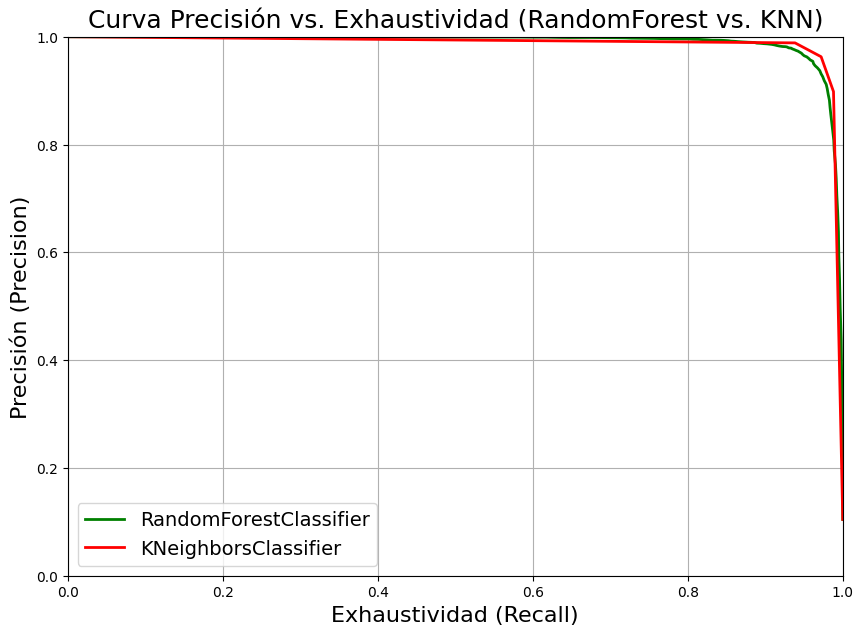

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(recalls_forest, precisions_forest, "g-", linewidth=2, label="RandomForestClassifier")
plt.plot(recalls_knn, precisions_knn, "r-", linewidth=2, label="KNeighborsClassifier")

plt.xlabel("Exhaustividad (Recall)", fontsize=16)
plt.ylabel("Precisión (Precision)", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.title("Curva Precisión vs. Exhaustividad (RandomForest vs. KNN)", fontsize=18)
plt.legend(loc="lower left", fontsize=14)
plt.show()


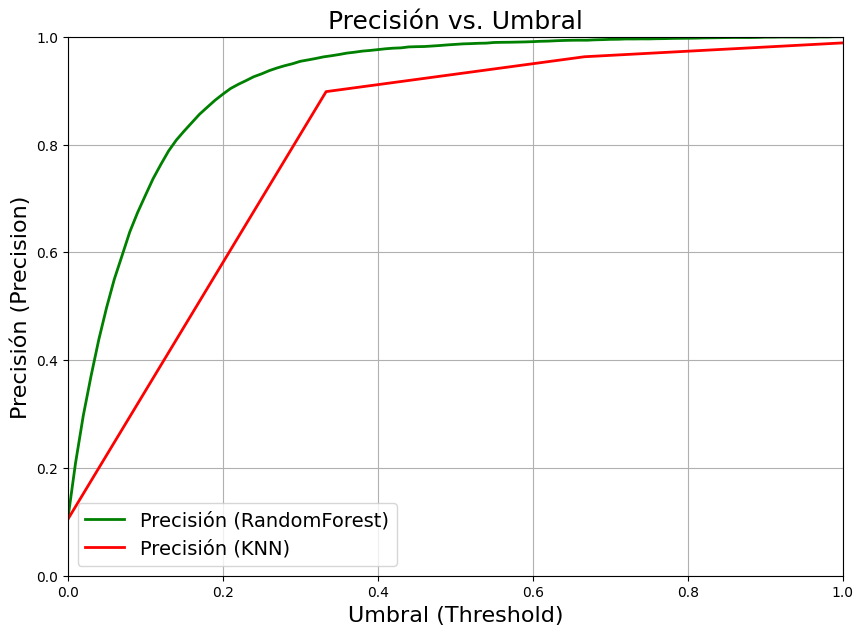

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

#Random Forest

plt.plot(thresholds_forest, precisions_forest[:-1], "g-", linewidth=2, label="Precisión (RandomForest)")

#KNN
plt.plot(thresholds_knn, precisions_knn[:-1], "r-", linewidth=2, label="Precisión (KNN)")

plt.xlabel("Umbral (Threshold)", fontsize=16)
plt.ylabel("Precisión (Precision)", fontsize=16)
plt.legend(loc="lower left", fontsize=14)
plt.grid(True)
plt.title("Precisión vs. Umbral", fontsize=18)
plt.axis([0, 1, 0, 1])
plt.show()



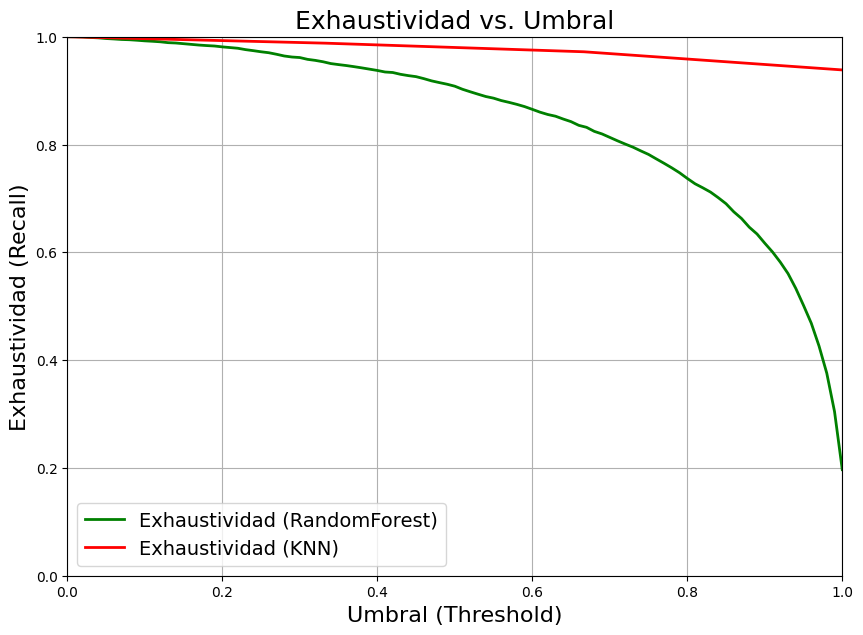

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
#Random Forest
plt.plot(thresholds_forest, recalls_forest[:-1], "g-", linewidth=2, label="Exhaustividad (RandomForest)")
#KNN
plt.plot(thresholds_knn, recalls_knn[:-1], "r-", linewidth=2, label="Exhaustividad (KNN)")

plt.xlabel("Umbral (Threshold)", fontsize=16)
plt.ylabel("Exhaustividad (Recall)", fontsize=16)
plt.legend(loc="lower left", fontsize=14)
plt.grid(True)
plt.title("Exhaustividad vs. Umbral", fontsize=18)
plt.axis([0, 1, 0, 1])
plt.show()


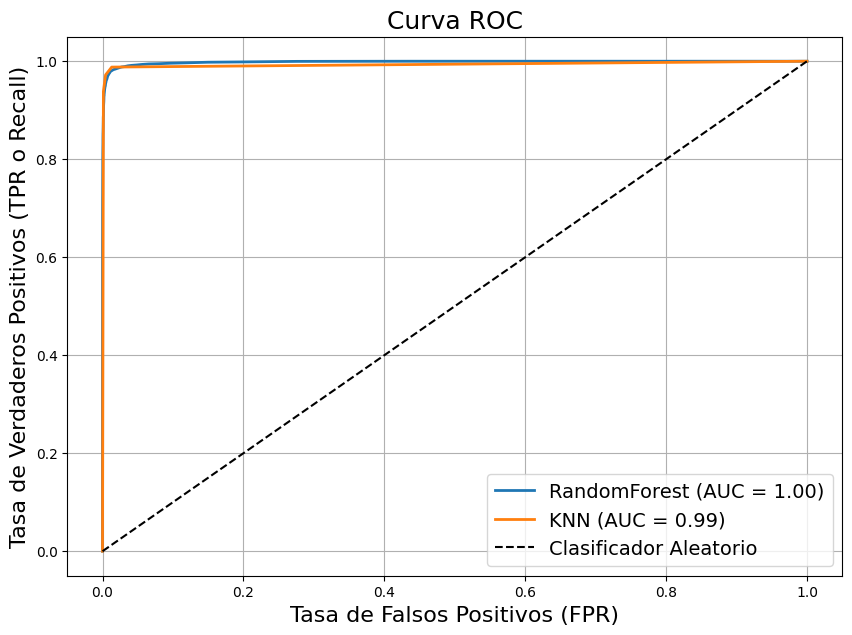

AUC para RandomForest: 1.00
AUC para KNN: 0.99


In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

#Random Forest
fpr_forest, tpr_forest, thresholds_roc_forest = roc_curve(y_train_7, y_scores_forest)
plt.plot(fpr_forest, tpr_forest, linewidth=2, label=f"RandomForest (AUC = {roc_auc_score(y_train_7, y_scores_forest):.2f})")

#KNN
fpr_knn, tpr_knn, thresholds_roc_knn = roc_curve(y_train_7, y_scores_knn)
plt.plot(fpr_knn, tpr_knn, linewidth=2, label=f"KNN (AUC = {roc_auc_score(y_train_7, y_scores_knn):.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Clasificador Aleatorio")

plt.xlabel("Tasa de Falsos Positivos (FPR)", fontsize=16)
plt.ylabel("Tasa de Verdaderos Positivos (TPR o Recall)", fontsize=16)
plt.grid(True)
plt.title("Curva ROC", fontsize=18)
plt.legend(loc="lower right", fontsize=14)
plt.show()

print(f"AUC para RandomForest: {roc_auc_score(y_train_7, y_scores_forest):.2f}")
print(f"AUC para KNN: {roc_auc_score(y_train_7, y_scores_knn):.2f}")
